<a href="https://colab.research.google.com/github/jerolg/Metodos_Computacionales_taller/blob/main/Asignaciones/Tareas/Entregas/Lopez_333/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tarea 4 metodos computacionales**

**Nombre**: Jerónimo López Gómez

**Cédula**: 1.001.735.333

Fecha de entrega: Viernes 18 de Octubre




In [1]:
#@markdown **Librerias**
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, interpolate
import pandas as pd
import sympy as sp




##**1. Movimiento de proyectiles en presencia de viento.**

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


###**0. Establezca las siguietnes condiciones inciales.**














In [ ]:
# Parametros iniciales

v0 = 60                #Velocidad en m/s
alpha = np.pi          #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2               #rapidez del viento
b = 0.05               #Parametro de friccion 
g = 9.87               #Aceleracion de la gravedad m/s2

Params = (theta, alpha, v0, b, u,g)  #Parametros en tupla.

###**1. Defina dos funciones, una para x y otra para y.**
Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}


In [ ]:
#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  
  x = u*np.cos(alpha)*t + (1/b*v0*np.cos(theta) - 1/b*u*np.cos(alpha))*(1 - np.exp(-b*t))
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):

  y = (1/b*g/b + 1/b*v0*np.sin(theta) - 1/b*u*np.sin(alpha))*(1 - np.exp(-b*t)) - (g/b - u*np.sin(alpha))*t
  return y 


###**2. Construya un diccionario con las claves "X", "Y", "Tiempo"**



In [ ]:
t = np.linspace(0,30,1000)
data = {'t' : [], 'X' : [], 'Y' : []}
for i in t:
  data['t'].append(i)
  data['X'].append(pos_x(i, *Params))
  data['Y'].append(pos_y(i, *Params))

###**3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.**


In [ ]:
df = pd.DataFrame.from_dict(data)
df

,t,X,Y
0,0.00000,0.000000,0.000000
1,0.03003,1.272434,1.268662
2,0.06006,2.541608,2.526527
3,0.09009,3.807525,3.773610
4,0.12012,5.070192,5.009928
...,...,...,...
995,29.87988,226.974382,-2178.457513
996,29.90991,226.561339,-2182.769991
997,29.93994,226.147564,-2187.084893
998,29.96997,225.733058,-2191.402215




###**4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).**


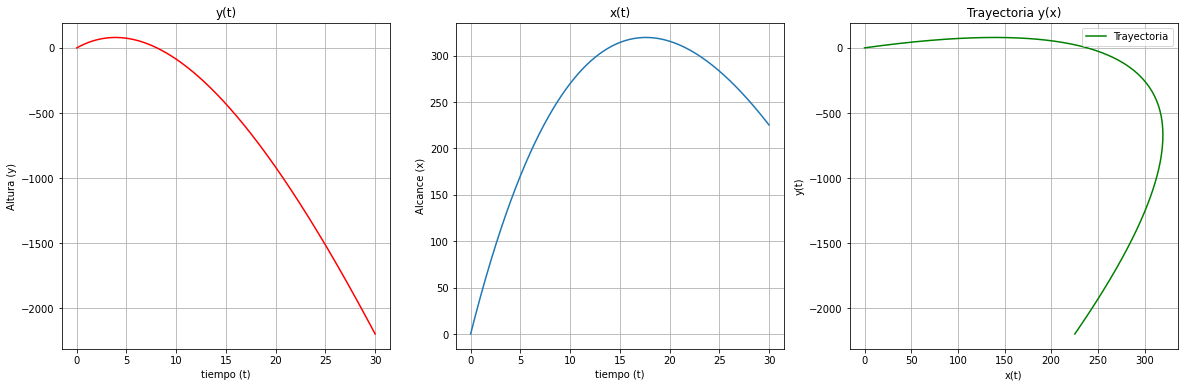

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(131)
plt.plot(df['t'], df['Y'],label='y(t)',c='r')
plt.xlabel('tiempo (t)')
plt.ylabel('Altura (y)')
plt.title('y(t)')
plt.grid()

plt.subplot(132)
plt.plot(df['t'], df['X'], label='x(t)')
plt.xlabel('tiempo (t)')
plt.ylabel('Alcance (x)')
plt.title('x(t)')
plt.grid()

plt.subplot(133)
plt.plot(df['X'],df['Y'], c='g', label='Trayectoria')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Trayectoria y(x)')
plt.grid()

plt.legend()
plt.show()



###**5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.** 


In [ ]:
#y=0 Fixed_Point method
f = lambda t : pos_y(t, *Params)
y_root = optimize.bisect(f,5,10)

print('alcance máximo : %.2f m para t : %.2f s'%(pos_x(y_root, *Params), y_root))

alcance máximo : 238.61 m para t : 8.06 s



###**6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.**



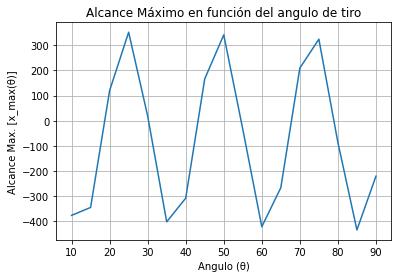

In [ ]:
θ = np.arange(10,95,5)   #Angulo en grados)
AuxParams = (θ, alpha, v0, b, u,g)

plt.plot(θ, pos_x(y_root, *AuxParams))
plt.xlabel('Angulo (θ)')
plt.title('Alcance Máximo en función del angulo de tiro')
plt.ylabel('Alcance Max. [x_max(θ)]')
plt.grid()
plt.show()

###**7. Realice una interpolacion de R como función de theta.**

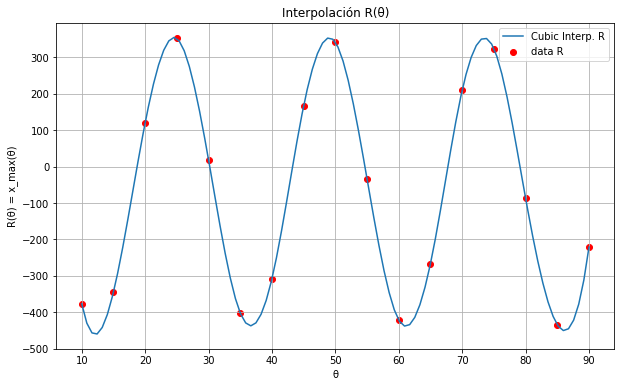

In [ ]:
#Interpolando R(θ), numpy interpolation
interp_R = interpolate.interp1d(θ, pos_x(y_root, *AuxParams), kind='cubic')
g = lambda x : interp_R(x)

θ_aux = np.linspace(10,90,100)

plt.figure(figsize=(10,6))

plt.plot(θ_aux, g(θ_aux), label='Cubic Interp. R')
plt.scatter(θ, pos_x(y_root, *AuxParams), c='r',label='data R')
plt.legend()
plt.title('Interpolación R(θ)')
plt.xlabel('θ')
plt.ylabel('R(θ) = x_max(θ)')
plt.grid()
plt.show()





# **2.0  Interpolación lagrange**

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [ ]:
#@markdown Ayuda: 

import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt

f_s = lambda x: 1/(1+25*x**2)
sp.init_printing(pretty_print=True, use_latex = True) # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
f_s(x)
print(sp.diff(f_s(x),x))
print(sp.diff(f_s(x),x, 1))
print(sp.diff(f_s(x),x, 2))
print(sp.diff(f_s(x),x, 3))
print(sp.diff(f_s(x),x, 4))
print(sp.diff(f_s(x),x, 5))
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) )
plt.show()

In [ ]:
#@markdown **Funcion**
func = lambda x : 1/(1+25*x**2)
x = sp.symbols('x')

Orden del Polinomio de Lagrange for n en [4,8,12,16,20] : 4


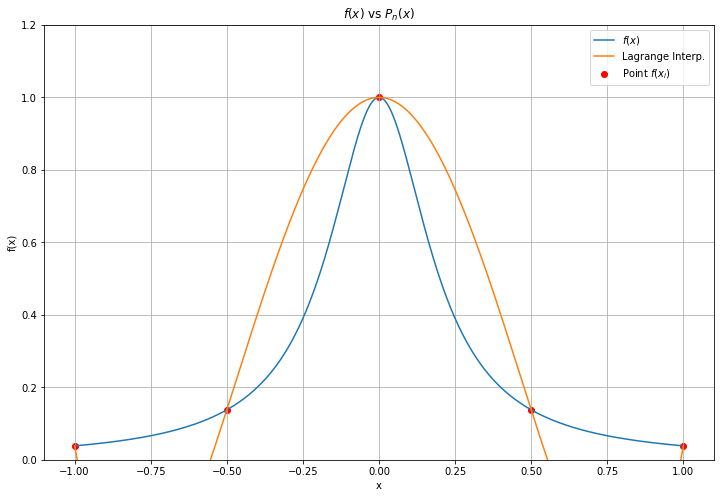

Lagrange Polynomial of order 4


In [ ]:
#@markdown **Grafico $f(x)$ y $P_n(x)$**
n = int(input('Orden del Polinomio de Lagrange for n en [4,8,12,16,20] : '))
X = np.linspace(-1, 1, n + 1 )
P_n = interpolate.lagrange(X, func(X))


dom = np.linspace(-1,1,1000)

plt.figure(figsize=(12,8))
plt.scatter(X, func(X), c='r', label='Point $f(x_i)$')
plt.plot(dom, func(dom), label='$f(x)$')
plt.plot(dom, P_n(dom), label='Lagrange Interp.')
plt.ylim(0,1.2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x)$ vs $P_n(x)$')
plt.legend()
plt.grid()
plt.show()

print(f'Lagrange Polynomial of order {n}')
sp.expand(P_n(x))


2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [ ]:
#@markdown Estimacion de la cota de error $\epsilon$ para $n = 4$ y $x_0 = 0.5$
w = int(input('Orden del polinomio de Lagrange a evaluar su cota de error : '))
point = float(input('punto a evaluar : '))
#Productoria
x = sp.symbols('x')
ζ = sp.symbols('ζ')
X = np.linspace(-1, 1, num = w)
 
prod = np.array([1])
for i in range(len(X)):
  k = (x-X[i]) * prod[i]
  prod = np.append(prod, k)


# Cota de Error en 0.5 para w=4

eval_D = sp.lambdify(x, sp.diff(func(x),x,w+1).doit(),'numpy')
eval_prod = sp.lambdify(x,prod[w],'numpy')

error = eval_D(ζ)/np.math.factorial(w+1) * eval_prod(point)
f_error = sp.lambdify(ζ, error,'numpy')

cota = max(f_error(abs(X)))
print(f'la cota de error para n : {w} en el punto x0 : {point} es0')
cota

Orden del polinomio de Lagrange a evaluar su cota de error : 4
punto a evaluar : 0.5
la cota de error para n : 4 en el punto x0 : 0.5 es0


In [ ]:
#@markdown Funcion para graficar
def max_ϵ(orden, punto):
  '''
  Orden : orden o conjunto de ordenes (numpy array) del polinomio a hallar
  punto : punto en el cual se evalua el error

  retorna numpy array con errores
  '''
  import numpy as np
  import sympy as sp
  ord_n = orden
  cota = np.array([])
  for j in  ord_n:
    index = [int(j+1)]
    x = sp.symbols('x')
    ζ = sp.symbols('ζ')
    X = np.linspace(-1, 1)
    D_n = sp.lambdify(x, sp.diff(func(x),x, index[0]),'numpy')
    ϵ_n = sp.lambdify(ζ, D_n(ζ)/np.math.factorial( j+1) * eval_prod(punto),'numpy')
    cota =  np.append(cota, max(ϵ_n(abs(X))))
  return cota


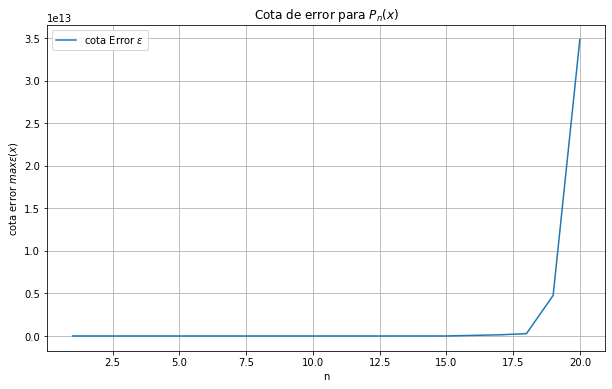

In [ ]:
#@markdown **Grafica Error**


plt.figure(figsize=(10,6))
n_aux = np.arange(1,21)
plt.plot(n_aux, max_ϵ(n_aux.tolist(), 0.5) , label='cota Error $\epsilon$')
plt.grid()
plt.xlabel('n')
plt.ylabel('cota error $max \epsilon(x)$')
plt.title('Cota de error para $P_n(x)$')
plt.legend()
plt.show()


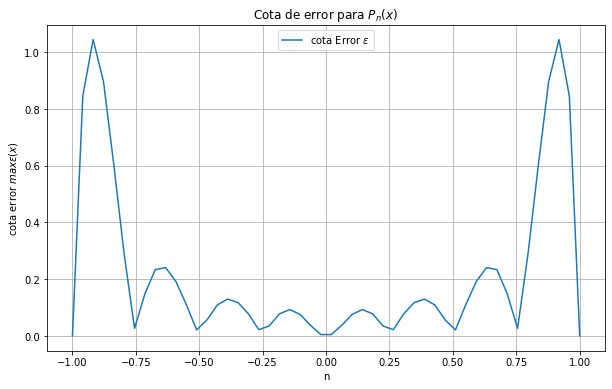

In [ ]:
#@markdown Error en funcion de x
plt.figure(figsize=(10,6))
x_aux = np.linspace(-1,1)
plt.plot(x_aux, abs(func(x_aux)-P_n(x_aux)), label='cota Error $\epsilon$')
plt.grid()
plt.xlabel('x')
plt.ylabel('cota error $max \epsilon(x)$')
plt.title('Cota de error para $P_n(x)$')
plt.legend()
plt.show()


#3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$





emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5


Orden del Polinomio de Lagrange for n en [4,8,12,16,20] : 4


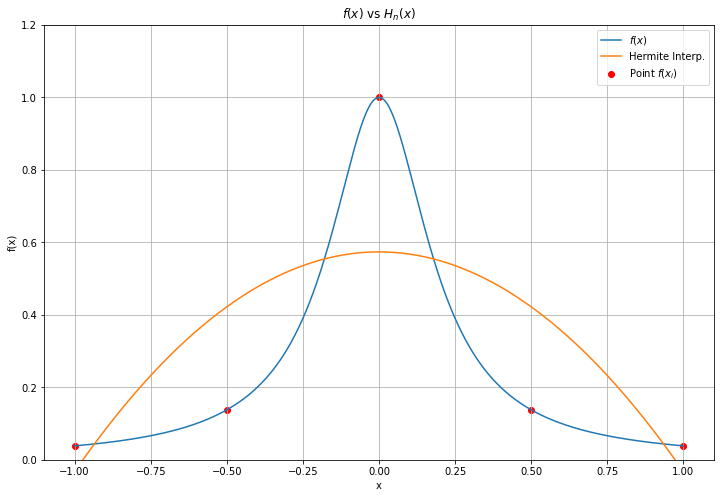

Hermite Polynomial of order 4


In [ ]:
#@markdown **Grafico $f(x)$ y $H_n(x)$**
n = int(input('Orden del Polinomio de Lagrange for n en [4,8,12,16,20] : '))
X = np.linspace(-1, 1, n + 1 )
H_n = np.polynomial.hermite.Hermite.fit(X,func(X),n-1)


dom = np.linspace(-1,1,1000)

plt.figure(figsize=(12,8))
plt.scatter(X, func(X), c='r', label='Point $f(x_i)$')
plt.plot(dom, func(dom), label='$f(x)$')
plt.plot(dom, H_n(dom), label='Hermite Interp.')
plt.ylim(0,1.2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x)$ vs $H_n(x)$')
plt.legend()
plt.grid()
plt.show()

print(f'Hermite Polynomial of order {n}')
sp.expand(H_n(x))

In [ ]:
#@markdown Estimacion de la cota de error $\epsilon$ para $n = 4$ y $x_0 = 0.5$
w = int(input('Orden del polinomio de Lagrange a evaluar su cota de error : '))
point = float(input('punto a evaluar : '))
#Productoria
x = sp.symbols('x')
ζ = sp.symbols('ζ')
X = np.linspace(-1, 1, num = w)
 
prod = np.array([1])
for i in range(len(X)):
  k = (x-X[i])**2 * prod[i]
  prod = np.append(prod, k)


# Cota de Error en 0.5 para w=4

eval_D = sp.lambdify(x, sp.diff(func(x),x,2*w+2).doit(),'numpy')
eval_prod = sp.lambdify(x,prod[w],'numpy')

error = eval_D(ζ)/np.math.factorial(2*w+2) * eval_prod(point)
f_error = sp.lambdify(ζ, error,'numpy')

cota = max(f_error(abs(X)))
print(f'la cota de error para n : {w} en el punto x0 : {point} es0')
cota

Orden del polinomio de Lagrange a evaluar su cota de error : 4
punto a evaluar : 0.5
la cota de error para n : 4 en el punto x0 : 0.5 es0


In [ ]:
#@markdown Funcion para graficar
def max_ϵHerm(orden, punto):
  '''
  Orden : orden o conjunto de ordenes (numpy array) del polinomio a hallar
  punto : punto en el cual se evalua el error

  retorna numpy array con errores
  '''
  import numpy as np
  import sympy as sp
  ord_n = orden
  cota = np.array([])
  for j in  ord_n:
    index = [int(2*j+2)]
    x = sp.symbols('x')
    ζ = sp.symbols('ζ')
    X = np.linspace(-1, 1)
    D_n = sp.lambdify(x, sp.diff(func(x),x, index[0]),'numpy')
    ϵ_n = sp.lambdify(ζ, D_n(ζ)/np.math.factorial(index[0]) * eval_prod(punto),'numpy')
    cota =  np.append(cota, max(ϵ_n(abs(X))))
  return cota

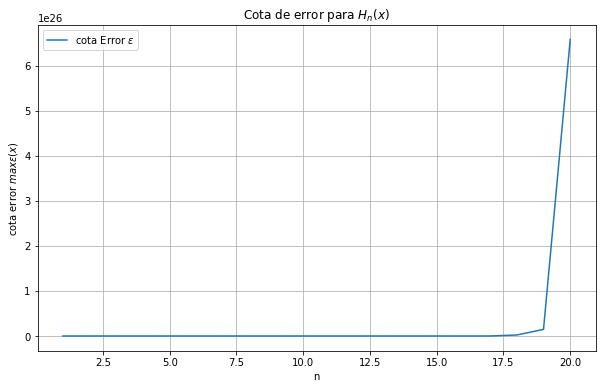

In [ ]:
#@markdown **Grafica Error**


plt.figure(figsize=(10,6))
n_aux = np.arange(1,21)
plt.plot(n_aux, max_ϵHerm(n_aux.tolist(), 0.5) , label='cota Error $\epsilon$')
plt.grid()
plt.xlabel('n')
plt.ylabel('cota error $max \epsilon(x)$')
plt.title('Cota de error para $H_n(x)$')
plt.legend()
plt.show()

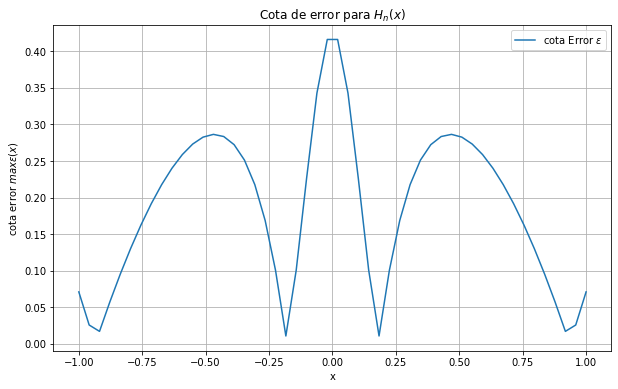

In [ ]:
#@markdown Error en funcion de x
plt.figure(figsize=(10,6))
x_aux = np.linspace(-1,1)
plt.plot(x_aux,abs(func(x_aux)-H_n(x_aux)), label='cota Error $\epsilon$')
plt.grid()
plt.xlabel('x')
plt.ylabel('cota error $max \epsilon(x)$')
plt.title('Cota de error para $H_n(x)$')
plt.legend()
plt.show()

# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/Metodos_Computacionales_taller/blob/main/Asignaciones/Tareas/Enunciados_2021_02/figuras/Fig.png?raw=true).

Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 


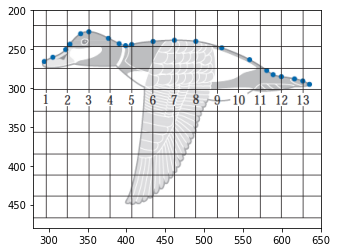

In [13]:
#@markdown Image Graphic representation
img = plt.imread('https://github.com/jerolg/Metodos_Computacionales_taller/blob/main/Asignaciones/Tareas/Enunciados_2021_02/figuras/Fig.png?raw=true')
plt.ylim(480,200)
plt.xlim(280,650)
plt.imshow(img)



2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.



In [16]:
#@markdown Puntos coordenados de la imagen

data_dict = {'x' : [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3],
             'y' : [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]}

df = pd.DataFrame(data_dict)
df

,x,y
0,0.9,1.30
1,1.3,1.50
2,1.9,1.85
3,2.1,2.10
4,2.6,2.60
5,3.0,2.70
6,3.9,2.40
7,4.4,2.15
8,4.7,2.05
9,5.0,2.10


3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.



In [33]:
#@markdown Lagrange Interpolate Polynomial $P(L)$
x = sp.symbols('x')
P_L = interpolate.lagrange(df.x, df.y)
sp.expand(P_L(x))

-3.07453078010802e-11*x**20 + 4.27948927144617e-9*x**19 - 2.77283085046603e-7*x**18 + 1.11075895423631e-5*x**17 - 0.000308159189308439*x**16 + 0.00628589966751655*x**15 - 0.097690380073041*x**14 + 1.18284031649904*x**13 - 11.3160515558665*x**12 + 86.2513979924854*x**11 - 525.812753506636*x**10 + 2564.20130819599*x**9 - 9968.97885733098*x**8 + 30677.634974066*x**7 - 73866.565678462*x**6 + 136777.900226632*x**5 - 189850.972861706*x**4 + 189994.993238064*x**3 - 128683.405779065*x**2 + 52462.5803287024*x - 9652.785079125

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



In [43]:
#@markdown Spline Cubics

#@markdown Se pensaba usar `sympy.interpolating_Spline(d, df.x, df.y)`, con `d`
#@markdown como orden de interpolación, pero no se ejecutó, se ejecutó sin resultado alguno

S = interpolate.CubicSpline(df.x, df.y)

S



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

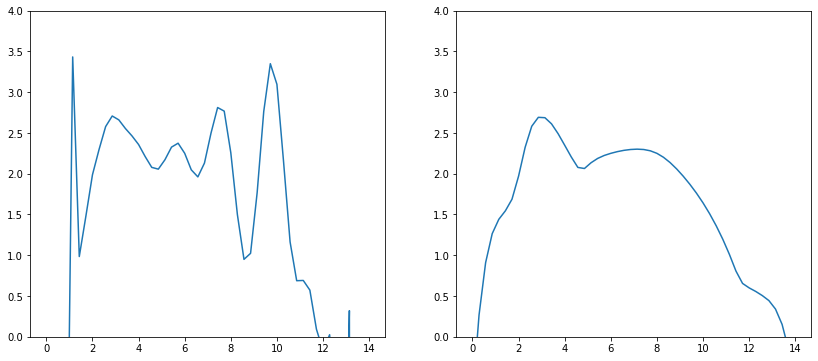

In [71]:
#@markdown Grafico

X_rang = np.linspace(0, 14)

size = plt.figure(figsize=(14, 6))

ax1 = size.add_subplot(121)
ax1.plot(X_rang, P_L(X_rang))
ax1.set_ylim(0,4)
ax2 = size.add_subplot(122)
ax2.plot(X_rang, S(X_rang))
ax2.set_ylim(0,4)
plt.show()

El fenómeno de las oscilaciones se ve muy pronunciado en la interpolacion de Lgrange $P(L)$, este fenómeno se da gracias al alto grado de interpolacion del polinomio, tenemos un alto numero $n$ de datos para interpolar, por tanto este no es el mejor método de interpolación, el mismo comportamoiento lo podemos ver en el primer punto de interpolación a medida que se varia n, es similar al fenomeno de Gibbs con aproximaciones por series de Fourier, en este caso se denomina el fenomeno de Runge. En el metodo por Spline Cubics, el polinomio de interpolacion es de grado 3 por tanto las oscilaciones no son tan apreciables como con la interpolacion de lagrange